In [1]:
if True:
    import time

    import pandas as pd
    #import streamlit as st
    import numpy as np
    import random
    import matplotlib.pyplot as plt
    import os
    import sklearn
    print(sklearn.__version__)
    #!pip install --upgrade scikit-learn
    #!pip install --upgrade scipy
    !pip install lightgbm
    print(sklearn.__version__)

    import pickle
    import numpy as np
    import pandas as pd

    from sklearn.model_selection import train_test_split


    DATA_VERSION = '11'


    def get_columns(version: int) -> pd.DataFrame:
        version_number = int(version)

        if version_number == 2:
            booleans = []
            floats = ['bedrooms', 'bathrooms', 'nearestStation', 'location.latitude', 'location.longitude']
            categories = ['tenure.tenureType']
            custom, wildcard = [], []

        elif version_number == 3 or version_number == 4:
            booleans = []
            floats = ['bedrooms', 'bathrooms', 'nearestStation', 'latitude_deviation', 'longitude_deviation']
            categories = ['tenure.tenureType']
            custom, wildcard = [], []

        elif version_number <= 6:
            booleans = []
            floats = ['bedrooms', 'bathrooms', 'nearestStation', 'location.latitude', 'location.longitude',
                      'latitude_deviation', 'longitude_deviation']
            categories = ['tenure.tenureType']
            custom, wildcard = [], []

        elif version_number == 7:
            booleans = []
            floats = ['bedrooms', 'bathrooms', 'nearestStation', 'location.latitude', 'location.longitude',
                      'latitude_deviation', 'longitude_deviation']
            categories = ['tenure.tenureType']
            custom = ['listingHistory.listingUpdateReason']
            wildcard = []
        elif version_number == 8:
            booleans = []
            floats = ['bedrooms', 'bathrooms', 'nearestStation', 'location.latitude', 'location.longitude',
                      'latitude_deviation', 'longitude_deviation', 'keyFeatures']
            categories = ['tenure.tenureType']
            custom = ['listingHistory.listingUpdateReason']
            wildcard = []
        elif version_number in [9, 10, 11, 12]:
            booleans = []
            floats = ['bedrooms', 'bathrooms', 'nearestStation', 'location.latitude', 'location.longitude',
                      'latitude_deviation', 'longitude_deviation']
            categories = ['tenure.tenureType']
            custom = []  # ['reduced_features']
            wildcard = ['feature__']

        else:
            raise ValueError(f'no columns data available for version {version}')

        columns = []
        columns.extend(booleans)
        columns.extend(floats)
        columns.extend(categories)
        columns.extend(custom)
        # columns.extend(wildcard)

        return (columns, booleans, floats, categories, custom, wildcard)



    def tt_split(VERSION, df, RANDOM_STATE=101, LABEL='Price'):
        debug_mode=False

        columns, booleans, floats, categories, custom, wildcard = get_columns(version=VERSION)

        for column in categories:
            df = pd.concat([df, pd.get_dummies(df[column], prefix=column)], axis=1)
            df.drop([column], axis=1, inplace=True)  # now drop the original column (you don't need it anymore),
            if debug_mode:print("updated df!!!")
            if debug_mode:print(df.head(1))
            if debug_mode:print("df.columns[1:]", df.columns[1:])
            feature_names_internal = df.columns[1:]
            if debug_mode:print("returnable_columns", feature_names_internal)

        # features = df[df.columns[:-1]].values
        features = df[df.columns[1:]].values
        # features = df[FEATURES].values
        labels = df[LABEL].values
        X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.9, random_state=RANDOM_STATE)

        #print("feature_names_internal", feature_names_internal)
        return X_train, X_test, y_train, y_test, feature_names_internal


    def load_standard_model(selected_model, directory='../../models_pretrained', model_type='standard'):
        if model_type == 'standard':
            model_path = f'{directory}/{selected_model}.pkl'
            model = pickle.load(open(model_path, 'rb'))
        elif model_type== 'neural':
            # model = keras.models.load_model('models/NN')
            # model = keras.models.load_model(f'models/{selected_model}')
            full_path = f'{directory}/{selected_model}'
            model = keras.models.load_model(full_path)
            print("directory", directory)
            print("selected_model", selected_model)
            print("full_path", full_path)
            model.summary()
            #raise ValueError('breakpoint')
        else:
            raise ValueError('type: ' + model_type)

    def load_model(selected_model):
        if selected_model == 'Stacked Model':
            raise ValueError ('operate stacked model')
        global DATA_VERSION, X_test, y_test, feature_names, previous_data_version
        try:
            # model_path = f'models_pretrained/{selected_model}.pkl'
            # model = pickle.load(open(model_path, 'rb'))
            #from functions_gh_presentation_and_launch import load_standard_model
            model = load_standard_model(selected_model=selected_model, model_type='neural' if 'eural' in selected_model else 'standard')
            DATA_VERSION = selected_model[-2:]
            X_test, y_test, feature_names = this_test_data(VERSION=DATA_VERSION, test_data_only=True, cloud_or_webapp_run=True, versioned=True)
        except:
            # raise ValueError(f'failed to load model: {model_path}')
            raise ValueError(f'failed to load model: {selected_model}')
        return model


    #from sklearn.metrics import PredictionErrorDisplay
    from sklearn.model_selection import cross_validate, cross_val_predict

    #from functions_b__get_the_data_2023 import get_source_dataframe
    #from functions_d3__prepare_store_data_2023 import this_test_data


    def get_source_dataframe(cloud_or_webapp_run, version, row_limit=None, folder_prefix='../../../'):

        filename = f'df_listings_v{version}.csv'
        remote_pathname = f'https://raw.githubusercontent.com/jayportfolio/capstone_streamlit/main/data/final/{filename}'
        df_pathname_raw = folder_prefix + f'data/source/{filename}'
        df_pathname_tidy = folder_prefix + f'data/final/{filename}'

        if cloud_or_webapp_run:
            df = pd.read_csv(remote_pathname, on_bad_lines='error', index_col=0)
            retrieval_type = 'tidy'
            print('loaded data from', folder_prefix + remote_pathname)
        else:
            df = pd.read_csv(df_pathname_tidy, on_bad_lines='error', index_col=0)
            retrieval_type = 'tidy'
            print('loaded data from', df_pathname_tidy)

        if row_limit and row_limit > 0:
            df = df[:row_limit]
        return df, retrieval_type

    !pip install catboost



1.2.1
1.2.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 16.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 41.2 MB/s eta 0:00:0000:0100:01


getting test data for version 11
ENDED UP IN GENERAL EXCEPTION train_test/feature_names_v11.csv not found.
train_test/feature_names_v11.csv not found.
loaded data from https://raw.githubusercontent.com/jayportfolio/capstone_streamlit/main/data/final/df_listings_v11.csv
test_data_only True
drop_nulls True


TypeError: estimator should be an estimator implementing 'fit' method, None was passed

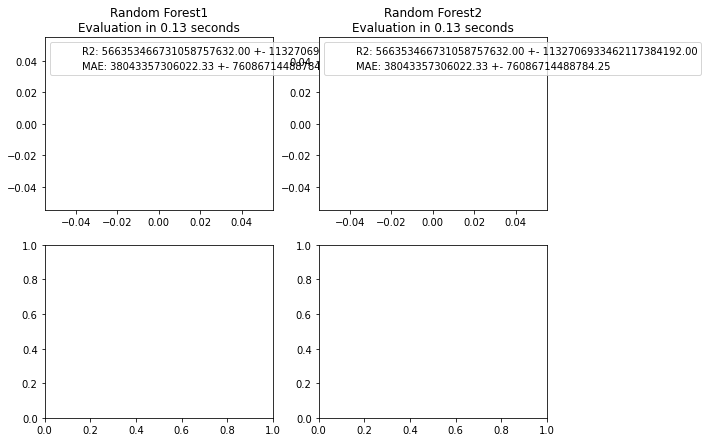

In [6]:

selected_model_key = 'Stacked Model' 
if True:
    if selected_model_key == 'Stacked Model':
        from sklearn.ensemble import StackingRegressor
        from sklearn.linear_model import RidgeCV

        from sklearn.linear_model import LinearRegression
        modell = LinearRegression()
        modell.fit(X_test, y_test)

        estimators = [
            ##("Random Forest1", load_model('optimised_model_XG Boost (tree)_v10')),
            ##("Random Forest2", load_model('optimised_model_XG Boost (tree)_v10')),
           # ("Random Forest2", load_model('optimised_model_CatBoost_v10(no dummies)_v10'))
            #("Lasso", lasso_pipeline),
            #("Gradient Boosting", gbdt_pipeline),

            
            ("Random Forest1", modell),
            ("Random Forest2", modell),
            ("Random Forest3", load_model('optimised_model_Linear Regression (Ridge)_v11')),
        
        ]

        stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())
        stacking_regressor

        X = X_test
        y = y_test

        fig, axs = plt.subplots(2, 2, figsize=(9, 7))
        axs = np.ravel(axs)

        for ax, (name, est) in zip(
                axs, estimators + [("Stacking Regressor", stacking_regressor)]
        ):
            scorers = {"R2": "r2", "MAE": "neg_mean_absolute_error"}

            start_time = time.time()
            scores = cross_validate(
                est, X, y, scoring=list(scorers.values()), n_jobs=-1, verbose=0
            )
            elapsed_time = time.time() - start_time

            y_pred = cross_val_predict(est, X, y, n_jobs=-1, verbose=0)
            scores = {
                key: (
                    f"{np.abs(np.mean(scores[f'test_{value}'])):.2f} +- "
                    f"{np.std(scores[f'test_{value}']):.2f}"
                )
                for key, value in scorers.items()
            }

            #display = PredictionErrorDisplay.from_predictions(
            #    y_true=y,
            #    y_pred=y_pred,
            #    kind="actual_vs_predicted",
            #    ax=ax,
            #    scatter_kwargs={"alpha": 0.2, "color": "tab:blue"},
            #    line_kwargs={"color": "tab:red"},
            #)
            ax.set_title(f"{name}\nEvaluation in {elapsed_time:.2f} seconds")

            for name, score in scores.items():
                ax.plot([], [], " ", label=f"{name}: {score}")
            ax.legend(loc="upper left")

        plt.suptitle("Single predictors versus stacked predictors")
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        plt.show()

        selected_model = 'stacked model_v11'
        model = stacking_regressor


In [ ]:
#from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
#X, y = load_diabetes(return_X_y=True)
estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42))
]
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                           random_state=42)
)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
reg.fit(X_train, y_train).score(X_test, y_test)

len(X_train[0])

In [57]:
#from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
#X, y = load_diabetes(return_X_y=True)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

X_train, y_train, X_test, y_test, feature_names = this_test_data(VERSION='06', test_data_only=False, cloud_or_webapp_run=True, versioned=True)
X_train, X_test, y_train, y_test, feature_names = this_test_data(VERSION='06', test_data_only=False, cloud_or_webapp_run=True, versioned=True)

#model1 = Ridge('model__alpha': 1e-05, 'model__copy_X': False, 'model__fit_intercept': True, 'model__max_iter': 1000, 'model__positive': False, 'model__random_state': 101, 'model__solver': 'sag', 'model__tol': 0.001)
model1 = Pipeline([
        #('mms', MinMaxScaler()),
        ('std_scaler', StandardScaler()),
        ('model', Ridge(alpha=1e-05,copy_X=False, fit_intercept=True, max_iter=1000,positive=False, random_state=101, solver='sag', tol=0.001))
    ])
model2 = Pipeline([
        #('mms', MinMaxScaler()),
        ('std_scaler', StandardScaler()),
        ('model',XGBRegressor())
    ])
model2.set_params(**{'model__booster': 'dart', 'model__colsample_bytree': 0.9, 'model__lambda': 1, 'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__max_features': None, 'model__max_leaf_nodes': 20, 'model__max_samples': 1, 'model__min_sample_split': None, 'model__min_samples_leaf': 2000, 'model__n_estimators': 500, 'model__n_jobs': 3, 'model__objective': 'reg:squarederror', 'model__subsample': 0.5, 'model__tree_method': 'hist', 'model__verbosity': 1})
model3 = Pipeline([
        #('mms', MinMaxScaler()),
        ('std_scaler', StandardScaler()),
        ('model',KNeighborsRegressor())
    ])
#model3.set_params(**{'model__algorithm': 'brute', 'model__leaf_size': 300, 'model__metric': 'minkowski', 'model__n_jobs': 2, 'model__n_neighbors': 13, 'model__p': 1, 'model__weights': 'distance'})
#model3.set_params(**{})
import lightgbm as lgb
from lightgbm import LGBMRegressor
model4 = Pipeline([
        #('mms', MinMaxScaler()),
        ('std_scaler', StandardScaler()),
        ('model',LGBMRegressor())
    ])
model4.set_params(**{'model__boosting_type': 'dart', 'model__colsample_bytree': 0.6000000000000001, 'model__is_unbalance': False, 'model__learning_rate': 0.5, 'model__metric': 'auc', 'model__min_child_samples': 20, 'model__n_estimators': 264, 'model__num_iterations': 1000, 'model__num_leaves': 20, 'model__verbose': 1})
#model3.set_params(**{})

estimators = [
#    ('lr', load_model('optimised_model_Linear Regression (Ridge)_v11')),
    ('lr', model4),
    ('lr2', model2),
    ('xgb', model2)
]
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                           random_state=42)
)
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, random_state=42
#)
reg.fit(X_train, y_train).score(X_test, y_test)

getting test data for version 06
getting test data for version 06
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1298
[LightGBM] [Info] Number of data points in the train set: 39714, number of used features: 10
[LightGBM] [Info] Start training from score 425241.939971


/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[19:43:49] WARNING: ../src/learner.cc:627: 
Parameters: { "max_leaf_nodes", "max_samples", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:46:04] WARNING: ../src/learner.cc:627: 
Parameters: { "max_leaf_nodes", "max_samples", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1298
[LightGBM] [Info] Number of data points in the train set: 31771, number of used features: 10
[LightGBM] [Info] Start training from score 425307.563155


/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1298
[LightGBM] [Info] Number of data points in the train set: 31771, number of used features: 10
[LightGBM] [Info] Start training from score 425367.997482


/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000947 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1298
[LightGBM] [Info] Number of data points in the train set: 31771, number of used features: 10
[LightGBM] [Info] Start training from score 425176.388593


/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1298
[LightGBM] [Info] Number of data points in the train set: 31771, number of used features: 10
[LightGBM] [Info] Start training from score 425304.504611


/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1298
[LightGBM] [Info] Number of data points in the train set: 31772, number of used features: 10
[LightGBM] [Info] Start training from score 425053.251951
[19:49:32] WARNING: ../src/learner.cc:627: 
Parameters: { "max_leaf_nodes", "max_samples", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:51:21] WARNING: ../src/learner.cc:627: 
Parameters: { "max_leaf_nodes", "max_samples", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters ge

0.6639179978620906

In [37]:
    def this_test_data(VERSION, test_data_only=False, drop_nulls=True, cloud_or_webapp_run=False, versioned=False):
        if not versioned:
            raise AttributeError("need to check all calls that don't use versioned=True, and rewrite if necessary")

        suffix = "_no_nulls" if drop_nulls else ""

        try:
            if versioned:
                print('getting test data for version', VERSION)
                X_train = np.loadtxt(f"../../train_test/X_train_v{VERSION}.csv", delimiter=",")
                y_train = np.loadtxt(f"../../train_test/y_train_v{VERSION}.csv", delimiter=",")
                X_test = np.loadtxt(f"../../train_test/X_test_v{VERSION}.csv", delimiter=",")
                y_test = np.loadtxt(f"../../train_test/y_test_v{VERSION}.csv", delimiter=",")
                #feature_names = np.loadtxt(f"train_test/feature_names_v{VERSION}.csv", delimiter=",")
                feature_names_str = np.genfromtxt(f"../../train_test/feature_names_v{VERSION}.csv",dtype='str')
                #print("feature_names")
                #print(type(feature_names_str))
                #print(feature_names_str)
                #print("000000", str(feature_names_str))
                x = str(feature_names_str)
                #print("x0",type(x), x)
                x = x[2:-2].replace("' '"," ")
                #print("x1",type(x), x)
                feature_names = x.split(',')
                #print("feature_names",type(feature_names), feature_names)
            elif not test_data_only:
                print('getting suffix test data', VERSION)
                X_train = np.loadtxt(f"../../train_test/X_train{suffix}.csv", delimiter=",")
                y_train = np.loadtxt(f"../../train_test/y_train{suffix}.csv", delimiter=",")
                X_test = np.loadtxt(f"../../train_test/X_test{suffix}.csv", delimiter=",")
                y_test = np.loadtxt(f"../../train_test/y_test{suffix}.csv", delimiter=",")
        except Exception as e:
            print('ENDED UP IN GENERAL EXCEPTION', e)
            print(e)
            df, retrieval_type = get_source_dataframe(cloud_or_webapp_run=cloud_or_webapp_run, version=VERSION, folder_prefix='')

            if drop_nulls:
                df.dropna(inplace=True)

            # xxxfeatures = df[df.columns[:-1]].values
            # features = df[FEATURES].values
            # labels = df[LABEL].values
            # X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.9, random_state=RANDOM_STATE)
            X_train, X_test, y_train, y_test, feature_names = tt_split(VERSION, df)
            #print("feature_names", "feature_names")

            print('test_data_only', test_data_only)
            print('drop_nulls', drop_nulls)

            if versioned:
                if not test_data_only:
                    np.savetxt(f"../../train_test/X_train_v{VERSION}.csv", X_train, delimiter=",", fmt="%f")
                    np.savetxt(f"../../train_test/y_train_v{VERSION}.csv", y_train, delimiter=",", fmt="%f")
                np.savetxt(f"../../train_test/X_test_v{VERSION}.csv", X_test, delimiter=",", fmt="%f")
                np.savetxt(f"../../train_test/y_test_v{VERSION}.csv", y_test, delimiter=",", fmt="%f")
                np.savetxt(f"../../train_test/feature_names_v{VERSION}.csv", [feature_names], delimiter=",", fmt="%s")
            else:
                if not test_data_only:
                    suffix = '_no_nulls' if drop_nulls else ''
                    print('suffix:', suffix)
                    print('text:', f"train_test/X_train{suffix}.csv")
                    print()
                    print(X_train)
                    print()
                    np.savetxt("../../train_test/X_train_no_nulls.csv", X_train, delimiter=",")
                    np.savetxt(f"../../train_test/y_train{suffix}.csv", y_train, delimiter=",")

                np.savetxt(f"../../train_test/X_test{suffix}.csv", X_test, delimiter=",")
                np.savetxt(f"../../train_test/y_test{suffix}.csv", y_test, delimiter=",")

        if not test_data_only:
            return X_train, X_test, y_train, y_test, feature_names

        return X_test, y_test, feature_names

X_train, X_test, y_train, y_test, feature_names = this_test_data(VERSION='06', test_data_only=False, cloud_or_webapp_run=True, versioned=True)

    
X_train[0]

getting test data for version 06


array([3.000000e+00, 3.000000e+00, 3.166130e-01, 5.145976e+01,
       1.293900e-01, 3.996000e-02, 2.338100e-01, 0.000000e+00,
       1.000000e+00, 0.000000e+00, 0.000000e+00])